<a href="https://colab.research.google.com/github/bcury/Machine-Learning-Projects/blob/main/Predict_Weather_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prever Temperatura

In [ ]:
import pandas as pd
temp_global = pd.read_csv('/content/GlobalTemperatures.csv')

In [ ]:
temp_global.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [ ]:
temp_global.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [ ]:
temp_global.shape

(3192, 9)

In [ ]:
temp_global.columns

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [ ]:
print(temp_global.isnull().sum())

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64


In [ ]:
def wrangle(df):
    df = df.copy()
    df = df.drop(columns=["LandAverageTemperatureUncertainty", "LandMaxTemperatureUncertainty",
                          "LandMinTemperatureUncertainty", "LandAndOceanAverageTemperatureUncertainty"], axis=1)
    


In [ ]:
def converttemp(x):
        x = (x * 1.8) + 32
        return float(x)

In [ ]:
df["LandAverageTemperature"] = ["LandAvrageTemperature"].apply(converttemp)
df["LandMaxTemperature"] = df["LandMaxTemperature"].apply(converttemp)
df["LandMinTemperature"] = df["LandMinTemperature"].apply(converttemp)
df["LandAndOceanAverageTemperature"] = df["LandAndOceanAverageTemperature"].apply(converttemp)
df["dt"] = pd.to_datetime(df["dt"])
df["Month"] = df["dt"].dt.month
df["Year"] = df["dt"].dt.year
df = df.drop("dt", axis=1)
df = df.drop("Month", axis=1)
df = df[df.Year &gt = 1850]
df = df.set_index(["Year"])
df = df.dropna()
return df
temp_global = wrangle(temp_global)
print(temp_global.head())


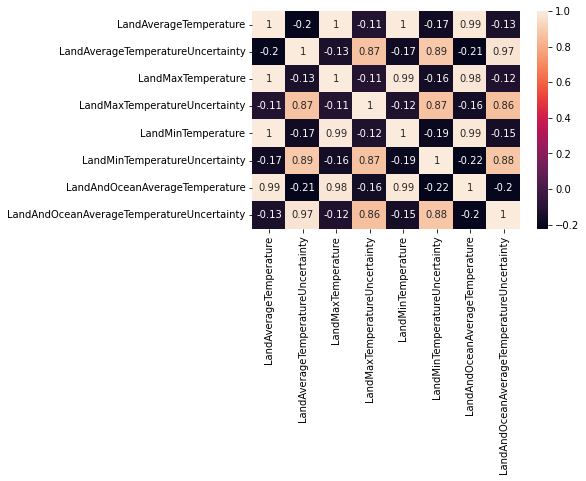

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corrMatrix = temp_global.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [ ]:
#separando nosso alvo pra prever o tempo
alvo = "LandAndOceanAverageTemperature"
y = temp_global[alvo]
x = temp_global[["LandAverageTemperature", "LandMaxTemperature", "LandMinTemperature"]]


In [ ]:
#treino e teste
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(x, y, test_size=0.25, random_state=42)
print(xtrain.shape)
print(xval.shape)
print(ytrain.shape)
print(yval.shape)

(2394, 3)
(798, 3)
(2394,)
(798,)


In [ ]:
from sklearn.metrics import mean_squared_error
ypred = [ytrain.mean()] * len(ytrain)





In [ ]:
#TREINANDO O MODELO
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


In [ ]:
forest = make_pipeline(SelectKBest(),StandardScaler(),RandomForestRegressor(
        n_estimators=100,
        max_depth=50,
        random_state=77,
        n_jobs=-1))



In [ ]:
#acuracia encontramos neste caso o erro de porcentagem media
import numpy as np
errors = abs(ypred -yval)
mape = 100* (errors/ytrain)
acuracia = 100 - np.mean(mape)
print("Random Forest Model:", round(acuracia, 2), "%")

Acurácia de 99,52%, excelente modelo para prever o tempo!!